# 图像旋转

In [2]:
#图像旋转
from skimage import data
import numpy as np,matplotlib.pyplot as plt

def rotating(img,theta):
    height=img.shape[0]# y
    width=img.shape[1]# x
    theta = (theta/180.0)*np.pi#极坐标
    ma=np.array([[-1,0,height/2.0],[0,1,-width/2.0],[0,0,1]])
    matrix=np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
    mc=np.array([[-1,0,height/2.0],[0,1,width/2.0],[0,0,1]])
    test=np.zeros_like(img,dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            org_coord = np.array([i,j,1])
            new_matrix=ma@org_coord.T
            new_matrix=matrix@new_matrix.T #@矩阵乘法 .T转置 
            new_matrix=mc@new_matrix.T
            new_matrix = new_matrix.astype(int)#强转
            if new_matrix[0]>=0 and new_matrix[0]<height and new_matrix[1]>=0 and new_matrix[1]<width:
                test[new_matrix[0],new_matrix[1]]=img[i,j]
    return test

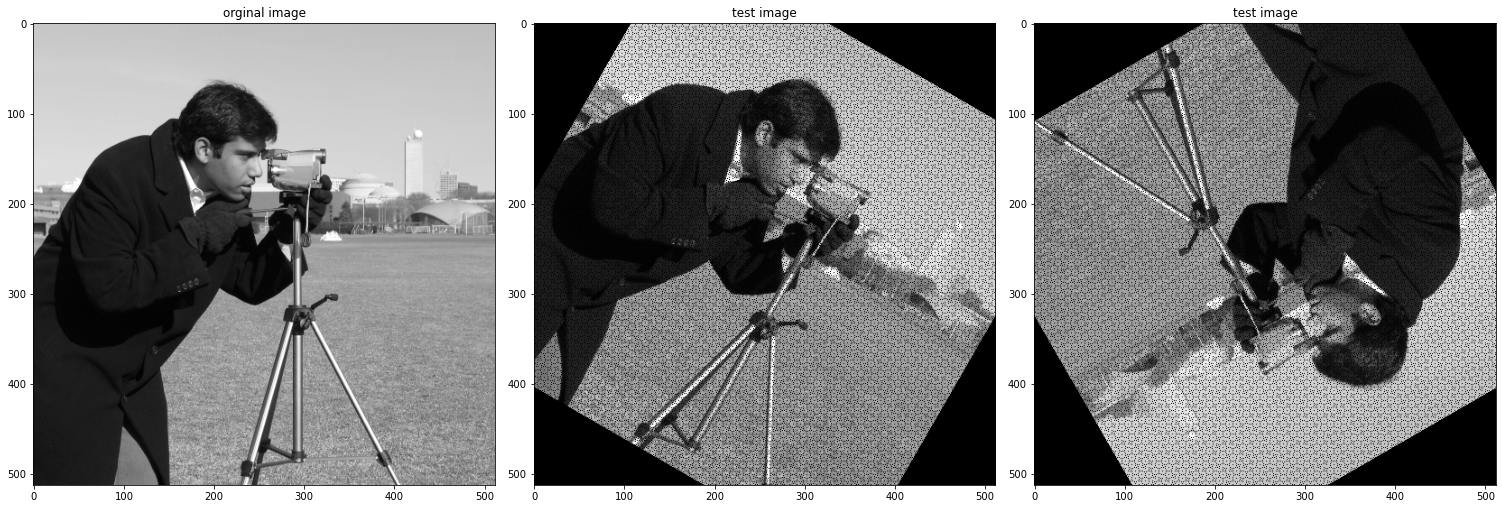

In [3]:
img = data.camera()
fig = plt.figure(figsize=(21,9))
org = fig.add_subplot(1,3,1)
org.imshow(img,cmap='gray')
org.set_title("orginal image")

_test = fig.add_subplot(1,3,2)
_test.imshow(rotating(img,30),cmap='gray')#旋转30度
_test.set_title("test image")

_test2 = fig.add_subplot(1,3,3)
_test2.imshow(rotating(img,150),cmap='gray')#旋转150度
_test2.set_title("test image")

plt.tight_layout()
plt.show()